In [1]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('intent - intent.csv')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Tags/Classes'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Frequencies')]

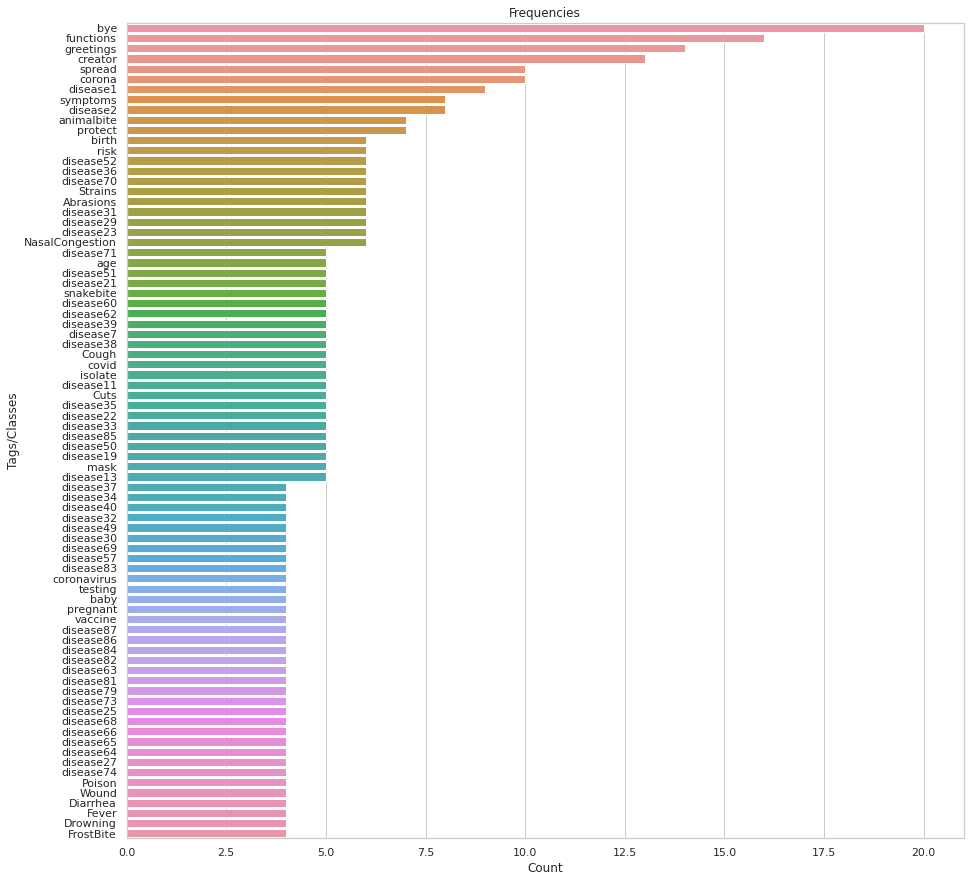

In [ ]:
# Countplot shows the distribution of author
plt.rcParams['figure.figsize'] = [15, 15]
sns.set(font_scale = 1, style = 'whitegrid')
df_tags = data.tags.value_counts().head(80)

graph = sns.barplot(df_tags,df_tags.index)
graph.set(xlabel = "Count", ylabel = "Tags/Classes", title = "Frequencies")

In [3]:
import numpy as np
import random

In [2]:
import nltk
nltk.download('punkt')
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [4]:
words=[]
classes = []
documents = []
ignore_words = ['?', '!']

with open('intents_2.json') as json_data:
    intents = json.load(json_data)


In [5]:
import random

In [6]:
for intent in intents['intents']:
    for pattern in intent['patterns']:

        #tokenize each word
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        #add documents in the corpus
        documents.append((w, intent['tag']))

        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [ ]:
print(len(words),len(classes),len(documents))

8350 246 810


In [7]:
classes

[['greetings'],
 ['bye'],
 ['creator'],
 ['age'],
 ['functions'],
 ['Cuts'],
 ['Abrasions'],
 ['stings'],
 ['Splinter'],
 'Sprains',
 ['Strains'],
 ['Fever'],
 ['Nasal Congestion'],
 ['Cough'],
 ['Sore Throat'],
 ['Gastrointestinal problems'],
 ['Skin problems'],
 ['Abdonominal Pain'],
 ['Bruises'],
 'Broken Toe',
 ['Choking'],
 'Wound',
 ['Diarrhea'],
 ['Frost bite'],
 ['Heat Exhaustion'],
 ['Heat Stroke'],
 ['Insect Bites'],
 ['nose bleed'],
 'Pulled Muscle',
 ['Rectal bleeding'],
 ['Sun Burn'],
 ['Testicle Pain'],
 ['Vertigo'],
 ['Normal Bleeding'],
 ['Eye Injury'],
 ['Chemical Burn'],
 ['Poison'],
 ['Teeth'],
 'seizure',
 ['Head Injury'],
 ['Fainting'],
 'Headache',
 ['Cold'],
 ['Rash'],
 'snake bite',
 ['animal bite'],
 ['Drowning'],
 ['CPR'],
 ['Fracture'],
 ['disease1'],
 ['disease2'],
 ['disease3'],
 ['disease4'],
 ['disease5'],
 ['disease6'],
 ['disease7'],
 ['disease8'],
 ['disease9'],
 ['disease10'],
 ['disease11'],
 ['disease12'],
 ['disease13'],
 ['disease14'],
 ['disease1

In [8]:
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))
# sort classes
# classes = sorted(list(set(classes)))
# documents = combination between patterns and intents
print (len(documents), "documents")
# classes = intents
print (len(classes), "classes", classes)
# words = all words, vocabulary
print (len(words), "unique lemmatized words", words)


pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

810 documents
246 classes [['greetings'], ['bye'], ['creator'], ['age'], ['functions'], ['Cuts'], ['Abrasions'], ['stings'], ['Splinter'], 'Sprains', ['Strains'], ['Fever'], ['Nasal Congestion'], ['Cough'], ['Sore Throat'], ['Gastrointestinal problems'], ['Skin problems'], ['Abdonominal Pain'], ['Bruises'], 'Broken Toe', ['Choking'], 'Wound', ['Diarrhea'], ['Frost bite'], ['Heat Exhaustion'], ['Heat Stroke'], ['Insect Bites'], ['nose bleed'], 'Pulled Muscle', ['Rectal bleeding'], ['Sun Burn'], ['Testicle Pain'], ['Vertigo'], ['Normal Bleeding'], ['Eye Injury'], ['Chemical Burn'], ['Poison'], ['Teeth'], 'seizure', ['Head Injury'], ['Fainting'], 'Headache', ['Cold'], ['Rash'], 'snake bite', ['animal bite'], ['Drowning'], ['CPR'], ['Fracture'], ['disease1'], ['disease2'], ['disease3'], ['disease4'], ['disease5'], ['disease6'], ['disease7'], ['disease8'], ['disease9'], ['disease10'], ['disease11'], ['disease12'], ['disease13'], ['disease14'], ['disease15'], ['disease16'], ['disease17'], ['

In [9]:

# create our training data
training = []
# create an empty array for our output
output_empty = [0] * len(classes)
# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # create our bag of words array with 1, if word match found in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    
    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    
    training.append([bag, output_row])
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)
# create train and test lists. X - patterns, Y - intents
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Training data created")


Training data created


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [10]:
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(np.array(train_x), np.array(train_y), random_state=87, test_size=0.30)

In [11]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
# Importing libraries to check model metrics and also K fold cross validation score 
import sklearn.metrics as metrics 
from sklearn.metrics import f1_score 
from sklearn.metrics import classification_report,confusion_matrix 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score


In [14]:

knn = KNeighborsClassifier() 
knn.fit(X_train,Y_train) #Training the model on training dataset 
y_pred_knn = knn.predict(X_test) #Predicting values of the test dataset 
y_pred_knn #Predicted values for KNN

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [26]:
# Finding K fold cross validation score for KNN Model 
scores_knn = cross_val_score(knn, X_test, Y_test,cv = 5,scoring='accuracy') 
print(scores_knn) 
print("KNN model has %0.2f accuracy with a standard deviation of %0.2f" % (scores_knn.mean(), scores_knn.std()))

[0.02040816 0.04081633 0.02040816 0.         0.02083333]
KNN model has 0.02 accuracy with a standard deviation of 0.01


In [28]:
# Model metrics - other form of checking model quality 
f1_score_knn = metrics.f1_score(Y_test,y_pred_knn,average='macro') 
print('F1 score: {0:f}'.format (f1_score_knn)) 
print(classification_report(Y_test,y_pred_knn)) 
sknn = precision_score(Y_test, y_pred_knn, average='macro') 
print('precision score: {0:f}'.format (sknn)) 
s_knn = recall_score(Y_test,y_pred_knn, average='macro') 
print('recall score: {0:f}'.format (s_knn)) 
score_knn = metrics.accuracy_score(Y_test,knn.predict(X_test)) 
print('Accuracy:{0:f}'.format(score_knn)) 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classifi

F1 score: 0.117247
              precision    recall  f1-score   support

           0       0.18      0.67      0.29         3
           1       1.00      0.11      0.20         9
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         1
           4       0.44      0.80      0.57         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
        

In [22]:
rf = RandomForestClassifier(n_estimators=100) 
rf.fit(X_train, Y_train) #Training the model on training dataset 
y_pred_rf = rf.predict(X_test) #Predicting values of the test dataset 
y_pred_rf #Predicted values for Random Forest

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [23]:
# Finding K fold cross validation score for Random Forest Model 
scores_rf = cross_val_score(rf, X_test, Y_test,cv = 5,scoring='accuracy') 
print(scores_rf) 
print("Random Forest model has %0.2f accuracy with a standard deviation of %0.2f" % (scores_rf.mean(), scores_rf.std()))

[0.36734694 0.26530612 0.24489796 0.375      0.20833333]
Random Forest model has 0.29 accuracy with a standard deviation of 0.07


In [25]:
#Model metrics - other form of checking model quality 
f1_score_rf = metrics.f1_score(Y_test,y_pred_rf,average='macro') 
print('F1 score: {0:f}'.format (f1_score_rf)) 
print(classification_report(Y_test,y_pred_rf)) 
srf = precision_score(Y_test, y_pred_rf, average='macro') 
print('precision score: {0:f}'.format (srf)) 
s_rf = recall_score(Y_test,y_pred_rf, average='macro') 
print('recall score: {0:f}'.format (s_rf)) 
score_rf = metrics.accuracy_score(Y_test,rf.predict(X_test)) 
print('Accuracy:{0:f}'.format(score_rf)) 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classifi

F1 score: 0.280230
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      0.56      0.71         9
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      0.80      0.89         5
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1
          10       1.00      0.50      0.67         2
          11       0.00      0.00      0.00         2
          12       1.00      0.33      0.50         3
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
        

In [31]:
import matplotlib.pyplot as plt

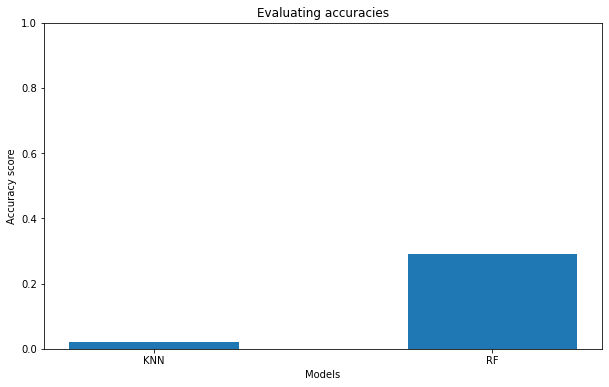

In [32]:
# Comparing K fold cross validation score of all the 6 models. 
# Plotting/Visual Comparison makes it easier to compare 
algo = ['KNN','RF'] 
score = [ scores_knn.mean(), scores_rf.mean()] 
plt.figure(figsize=(10,6)) 
plt.bar(algo,score,width=0.5) 
plt.title('Evaluating accuracies') 
plt.xlabel('Models') 
plt.ylabel('Accuracy score') 
plt.ylim(0,1) 
plt.show()